In [1]:
#Libraries for Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process
import nltk
from nltk.corpus import stopwords
import re

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     S:\Klaus\MSR\Seenu's\Projects\Movie
[nltk_data]     Reco\myenv\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
movies_df1 = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
movies_df1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [7]:
movies_df1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
movies_df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
movies_df1.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [11]:
movies_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [12]:
movies_df1.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [13]:
movies_df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4803, dtype: bool

In [15]:
movies_df1.shape

(4803, 20)

In [16]:
movies_df = movies_df1[['title', 'overview', 'genres']].dropna()

In [17]:
movies_df

,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...,...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4801,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[]


In [19]:
movies_df['cleaned_title'] = movies_df['title'].apply(lambda x: x.lower().replace(" ", ""))

In [20]:
movies_df['cleaned_title']

0                                   avatar
1       piratesofthecaribbean:atworld'send
2                                  spectre
3                       thedarkknightrises
4                               johncarter
                       ...                
4798                            elmariachi
4799                             newlyweds
4800               signed,sealed,delivered
4801                       shanghaicalling
4802                        mydatewithdrew
Name: cleaned_title, Length: 4800, dtype: object

In [21]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [22]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['overview'])

In [23]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 170613 stored elements and shape (4800, 5000)>

In [24]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [25]:
cosine_sim

array([[1.        , 0.04607058, 0.02497447, ..., 0.04290263, 0.02302846,
        0.01804409],
       [0.04607058, 1.        , 0.05665718, ..., 0.06479708, 0.04276436,
        0.02823763],
       [0.02497447, 0.05665718, 1.        , ..., 0.05524097, 0.02336837,
        0.0250273 ],
       ...,
       [0.04290263, 0.06479708, 0.05524097, ..., 1.        , 0.06503628,
        0.03341643],
       [0.02302846, 0.04276436, 0.02336837, ..., 0.06503628, 1.        ,
        0.06670789],
       [0.01804409, 0.02823763, 0.0250273 , ..., 0.03341643, 0.06670789,
        1.        ]])

In [26]:
movies_df = movies_df.reset_index(drop=True)

In [27]:
movies_df

,title,overview,genres,cleaned_title
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",avatar
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",piratesofthecaribbean:atworld'send
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",spectre
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",thedarkknightrises
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",johncarter
...,...,...,...,...
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",elmariachi
4796,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",newlyweds
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","signed,sealed,delivered"
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],shanghaicalling


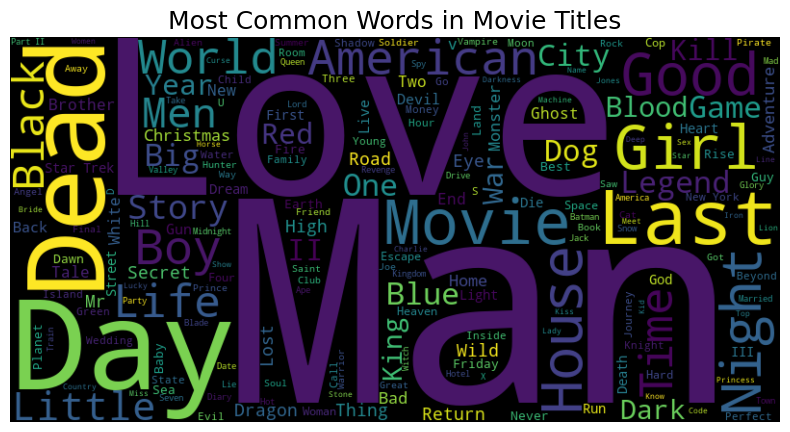

In [15]:
text = " ".join(movies_df['title'].values)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Movie Titles", fontsize=18)
plt.show()

In [28]:
import ast

def extract_genres(genres_str):
    genres_list = ast.literal_eval(genres_str)
    return [genre['name'] for genre in genres_list]

In [29]:
movies_df['genres'] = movies_df['genres'].apply(extract_genres)

In [30]:
movies_df['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4795                        [Action, Crime, Thriller]
4796                                [Comedy, Romance]
4797               [Comedy, Drama, Romance, TV Movie]
4798                                               []
4799                                    [Documentary]
Name: genres, Length: 4800, dtype: object

C:\Users\seenu\AppData\Local\Temp\ipykernel_18156\1099858131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')


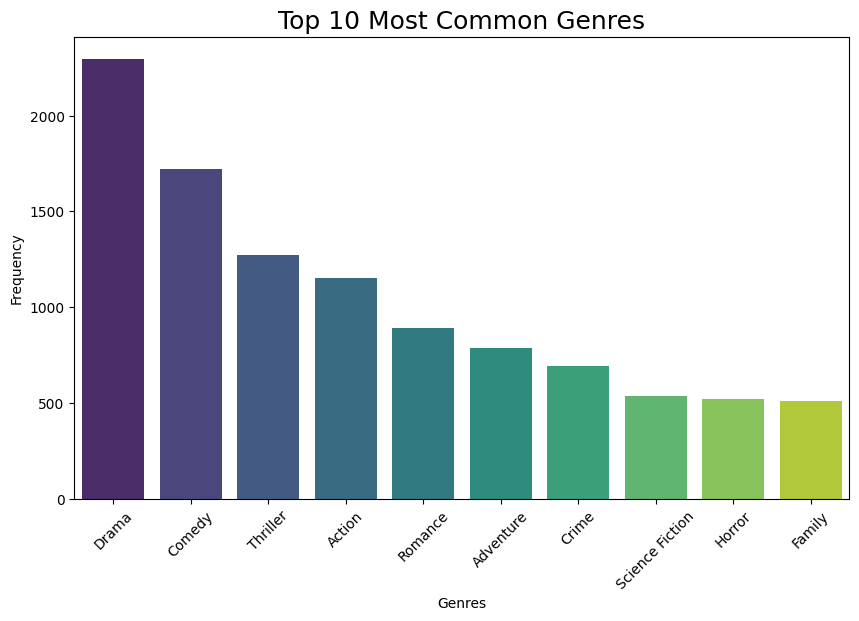

In [31]:
# Flatten the genres list and count the occurrences
all_genres = [genre for genres in movies_df['genres'] for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')
plt.title("Top 10 Most Common Genres", fontsize=18)
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

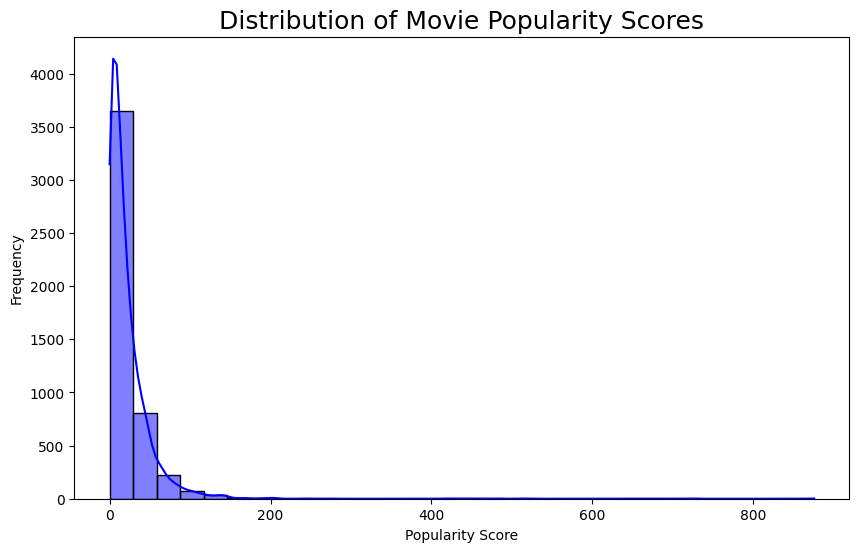

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df1['popularity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Movie Popularity Scores", fontsize=18)
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

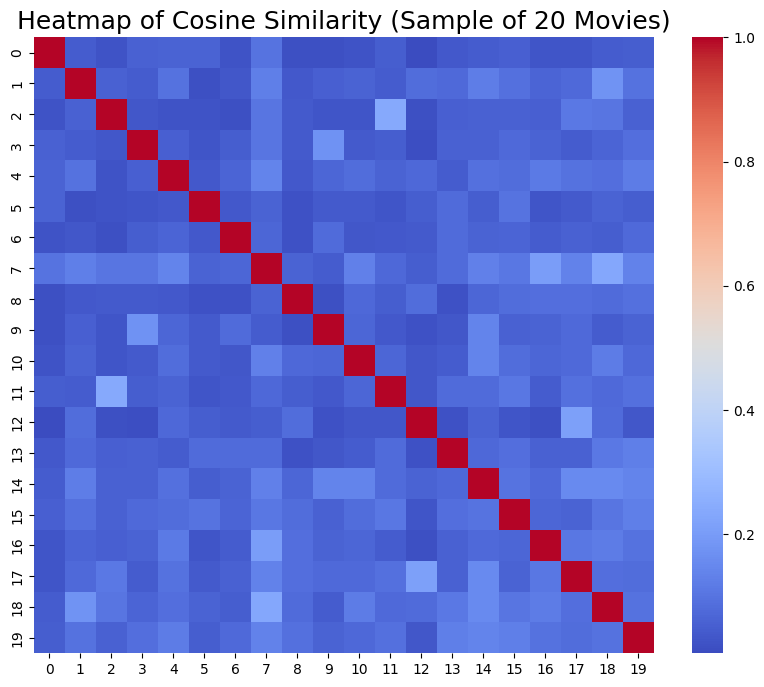

In [18]:
plt.figure(figsize=(10, 8))
sample_sim = cosine_sim[:20, :20]  # Sample the first 20 movies for visualization
sns.heatmap(sample_sim, annot=False, cmap='coolwarm')
plt.title("Heatmap of Cosine Similarity (Sample of 20 Movies)", fontsize=18)
plt.show()

In [19]:
from tmdbv3api import TMDb, Movie
import requests
from PIL import Image
from io import BytesIO

In [20]:
# Initialize TMDb API
tmdb = TMDb()
tmdb.api_key = '442bad6c754858897b423098d2732eb3'

In [21]:
def fetch_movie_poster(title):
    movie = Movie()
    search_results = movie.search(title)
    
    if search_results:
        movie_id = search_results[0].id
        movie_details = movie.details(movie_id)
        poster_path = movie_details.poster_path
        full_poster_url = f"https://image.tmdb.org/t/p/w500{poster_path}"
        return full_poster_url  # Returning the poster URL
    return None

In [22]:
def recommend_movies_with_posters(title, cosine_sim=cosine_sim, df=movies_df):
    # Preprocess the input title to make it lowercase and remove spaces
    title = title.lower().replace(" ", "")
    
    # Find the closest matching title using fuzzy matching on 'cleaned_title'
    closest_match = process.extractOne(title, df['cleaned_title'])
    
    if closest_match is not None:
        closest_title = closest_match[0]
        
        # Get the index of the closest matching movie
        idx = df[df['cleaned_title'] == closest_title].index[0]
        
        # Compute similarity scores for all movies
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Get the top 10 similar movies
        
        # Get the indices of the similar movies
        movie_indices = [i[0] for i in sim_scores]
        
        # Retrieve titles, overviews, and genres (overview remains unchanged)
        movie_titles = df['title'].iloc[movie_indices]
        movie_overviews = df['overview'].iloc[movie_indices]  # Unchanged overview
        movie_genres = df['genres'].iloc[movie_indices]
        similarity_scores = [score[1] for score in sim_scores]
        
        # Visualization: Bar chart of similarity scores
        plt.figure(figsize=(10, 6))
        sns.barplot(x=similarity_scores, y=movie_titles, palette='rocket')
        plt.title(f"Top 10 Movie Recommendations for '{df['title'].iloc[idx]}'", fontsize=18)
        plt.xlabel("Similarity Score")
        plt.ylabel("Movie Title")
        plt.show()

        # Print and display movie details along with posters
        for i in range(len(movie_titles)):
            print(f"\nMovie Title: {movie_titles.iloc[i]}")
            print(f"Genres: {', '.join(movie_genres.iloc[i])}")
            print(f"Overview: {movie_overviews.iloc[i]}\n")
            
            # Fetch and display movie poster
            poster_url = fetch_movie_poster(movie_titles.iloc[i])
            if poster_url:
                response = requests.get(poster_url)
                img = Image.open(BytesIO(response.content))
                img.show()  # Opens the poster image
            else:
                print("Poster not found.\n")
        
        return movie_titles
    else:
        print("No similar movies found. Please check the title and try again.")
        return []

Enter a movie title:  ironman


Movies similar to ironman:


C:\Users\seenu\AppData\Local\Temp\ipykernel_27108\919116340.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similarity_scores, y=movie_titles, palette='rocket')


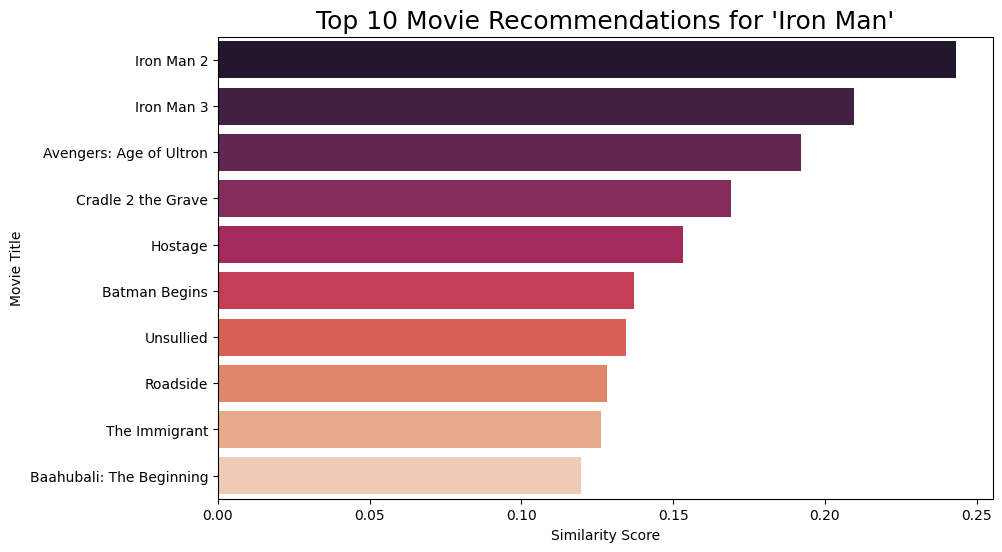


Movie Title: Iron Man 2
Genres: Adventure, Action, Science Fiction
Overview: With the world now aware of his dual life as the armored superhero Iron Man, billionaire inventor Tony Stark faces pressure from the government, the press and the public to share his technology with the military. Unwilling to let go of his invention, Stark, with Pepper Potts and James 'Rhodey' Rhodes at his side, must forge new alliances – and confront powerful enemies.


Movie Title: Iron Man 3
Genres: Action, Adventure, Science Fiction
Overview: When Tony Stark's world is torn apart by a formidable terrorist called the Mandarin, he starts an odyssey of rebuilding and retribution.


Movie Title: Avengers: Age of Ultron
Genres: Action, Adventure, Science Fiction
Overview: When Tony Stark tries to jumpstart a dormant peacekeeping program, things go awry and Earth’s Mightiest Heroes are put to the ultimate test as the fate of the planet hangs in the balance. As the villainous Ultron emerges, it is up to The Ave

79                    Iron Man 2
31                    Iron Man 3
7        Avengers: Age of Ultron
1868          Cradle 2 the Grave
538                      Hostage
119                Batman Begins
4231                   Unsullied
4571                    Roadside
2493               The Immigrant
1290    Baahubali: The Beginning
Name: title, dtype: object

In [24]:
user_input = input("Enter a movie title: ")
print(f"Movies similar to {user_input}:")
recommend_movies_with_posters(user_input)